In [1]:
import pickle
import numpy as np

In [2]:
df = pickle.load(open('data/novel/data_cleaned.p','rb'))
df

,_name,appears_in_scene_001,appears_in_scene_002,appears_in_scene_003,appears_in_scene_004,appears_in_scene_005,appears_in_scene_006,appears_in_scene_007,appears_in_scene_008,appears_in_scene_009,...,appears_in_scene_466,appears_in_scene_467,appears_in_scene_468,appears_in_scene_469,appears_in_scene_470,appears_in_scene_471,appears_in_scene_472,appears_in_scene_473,appears_in_scene_474,appears_in_scene_475
0,贾演,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,贾源,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,贾代化,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,贾代善,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,贾代儒,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,贾代修,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,贾敷,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,贾敬,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,贾赦,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,贾政,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,1,0


In [3]:
array_to_plot = []
for index,character in df.iterrows():
    current = []
    for a in character.keys():
        if 'appears_in_scene_' in a:
            current.append(character[a])
    array_to_plot.append(current)
array_to_plot = np.array(array_to_plot)

# Test - PCA 3D

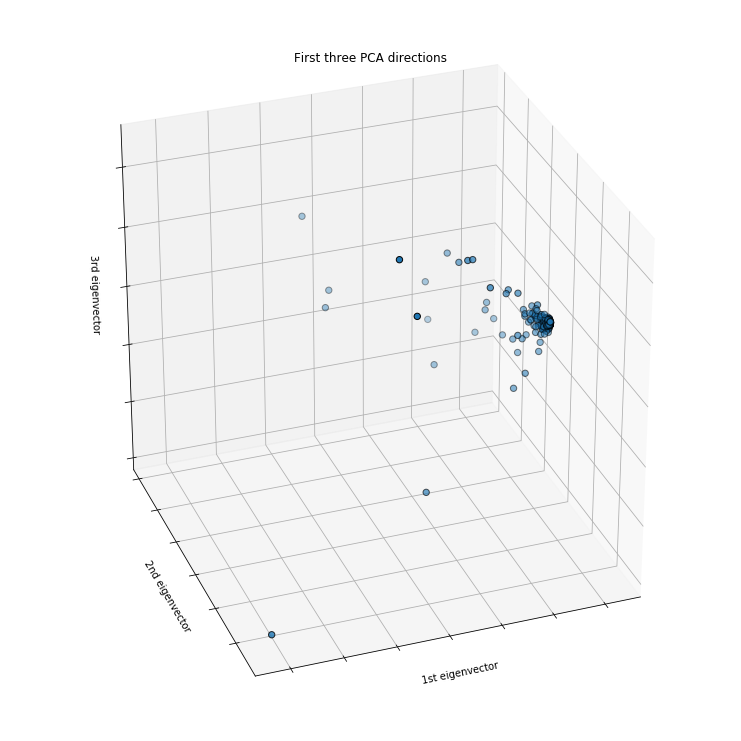

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

X = array_to_plot

fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# PCA 2D

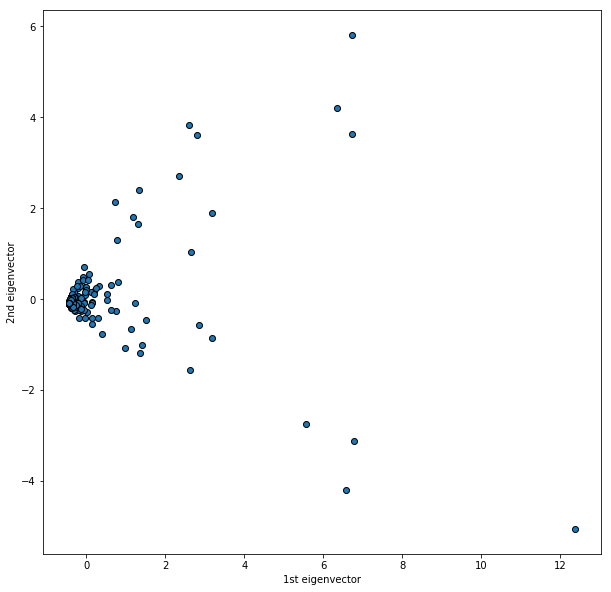

In [5]:
fig = plt.figure(1, figsize=(10, 10))
plt.clf()
X_reduced = PCA(n_components=3).fit_transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], edgecolor='k')
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")

plt.show()

# Based on Coordinates

Automatically created module for IPython interactive environment
Computing random projection


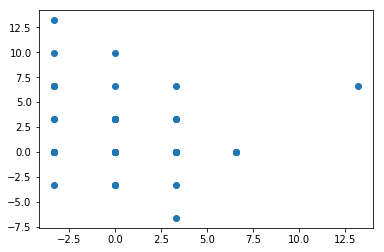

Computing PCA projection


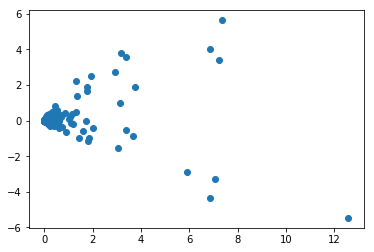

Computing Isomap embedding
Done.


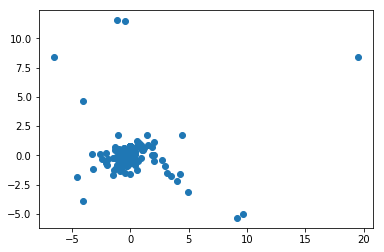

Computing LLE embedding
Done. Reconstruction error: 3.18717e-06


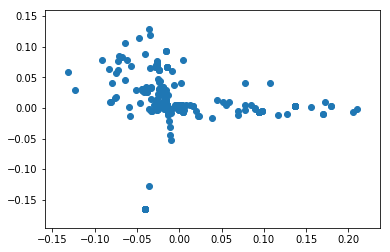

Computing modified LLE embedding
Done. Reconstruction error: 1.22835


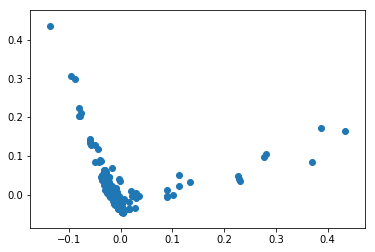

Computing LTSA embedding


/Users/xavier/anaconda/envs/py35/lib/python3.6/site-packages/scipy/linalg/decomp_lu.py:71: RuntimeWarning: Diagonal number 16 is exactly zero. Singular matrix.
  RuntimeWarning)


Done. Reconstruction error: nan


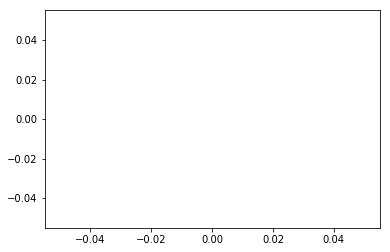

Computing MDS embedding
Done. Stress: 41798.129313


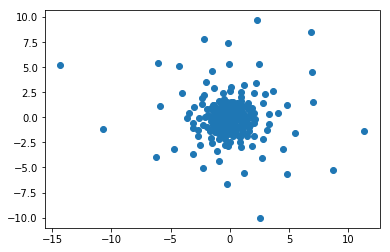

Computing Totally Random Trees embedding


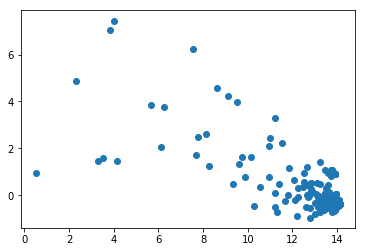

Computing Spectral embedding


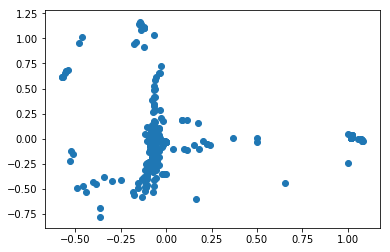

Computing t-SNE embedding


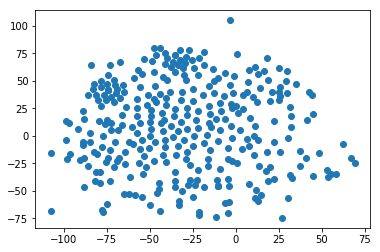

In [6]:
# Authors: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

# digits = datasets.load_digits(n_class=6)
X = array_to_plot
y = range(len(X[0]))
n_samples, n_features = X.shape
n_neighbors = 30


#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    plt.scatter(x=np.array(X).T[0],y=np.array(X).T[1])
    plt.show()

#----------------------------------------------------------------------
# Plot images of the digits
# n_img_per_row = 20
# img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
# for i in range(n_img_per_row):
#     ix = 10 * i + 1
#     for j in range(n_img_per_row):
#         iy = 10 * j + 1
#         img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

# plt.imshow(img, cmap=plt.cm.binary)
# plt.xticks([])
# plt.yticks([])
# plt.title('A selection from the 64-dimensional digits dataset')


#----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")


#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Projection on to the first 2 linear discriminant components

# print("Computing Linear Discriminant Analysis projection")
# X2 = X.copy().astype(float)
# X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
# t0 = time()
# X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)
# plot_embedding(X_lda,
#                "Linear Discriminant projection of the digits (time %.2fs)" %
#                (time() - t0))


#----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_lle,
               "Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_mlle,
               "Modified Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# HLLE embedding of the digits dataset
# print("Computing Hessian LLE embedding")
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
#                                       method='hessian')
# t0 = time()
# X_hlle = clf.fit_transform(X)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_hlle,
#                "Hessian Locally Linear Embedding of the digits (time %.2fs)" %
#                (time() - t0))


#----------------------------------------------------------------------
# LTSA embedding of the digits dataset
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_ltsa,
               "Local Tangent Space Alignment of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds,
               "MDS embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Random Trees embedding of the digits dataset
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced,
               "Random forest embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)

plot_embedding(X_se,
               "Spectral embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

In [7]:
# 1D
# Authors: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

# digits = datasets.load_digits(n_class=6)
X = array_to_plot
y = range(len(X[0]))
n_samples, n_features = X.shape
n_neighbors = 30


#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    print('')

#----------------------------------------------------------------------
# Plot images of the digits
# n_img_per_row = 20
# img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
# for i in range(n_img_per_row):
#     ix = 10 * i + 1
#     for j in range(n_img_per_row):
#         iy = 10 * j + 1
#         img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

# plt.imshow(img, cmap=plt.cm.binary)
# plt.xticks([])
# plt.yticks([])
# plt.title('A selection from the 64-dimensional digits dataset')


#----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=1, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")


#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=1).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Projection on to the first 2 linear discriminant components

# print("Computing Linear Discriminant Analysis projection")
# X2 = X.copy().astype(float)
# X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
# t0 = time()
# X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)
# plot_embedding(X_lda,
#                "Linear Discriminant projection of the digits (time %.2fs)" %
#                (time() - t0))


#----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=1).fit_transform(X)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=1,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_lle,
               "Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=1,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_mlle,
               "Modified Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# HLLE embedding of the digits dataset
# print("Computing Hessian LLE embedding")
# clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
#                                       method='hessian')
# t0 = time()
# X_hlle = clf.fit_transform(X)
# print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
# plot_embedding(X_hlle,
#                "Hessian Locally Linear Embedding of the digits (time %.2fs)" %
#                (time() - t0))


#----------------------------------------------------------------------
# LTSA embedding of the digits dataset
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=1,
                                      method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_ltsa,
               "Local Tangent Space Alignment of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=1, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds,
               "MDS embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Random Trees embedding of the digits dataset
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=1)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced,
               "Random forest embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=1, random_state=0,
                                      eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)

plot_embedding(X_se,
               "Spectral embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=1, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

Automatically created module for IPython interactive environment
Computing random projection

Computing PCA projection

Computing Isomap embedding
Done.

Computing LLE embedding
Done. Reconstruction error: 1.10298e-08

Computing modified LLE embedding
Done. Reconstruction error: 0.569741

Computing LTSA embedding


/Users/xavier/anaconda/envs/py35/lib/python3.6/site-packages/scipy/linalg/decomp_lu.py:71: RuntimeWarning: Diagonal number 16 is exactly zero. Singular matrix.
  RuntimeWarning)


Done. Reconstruction error: nan

Computing MDS embedding
Done. Stress: 85874.915509

Computing Totally Random Trees embedding

Computing Spectral embedding

Computing t-SNE embedding



In [8]:
data_1D = [
X_projected,
X_iso,
X_lle,
X_mlle,
X_ltsa,
X_reduced,
X_se,
X_tsne
]

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/xavier/anaconda/envs/py35/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


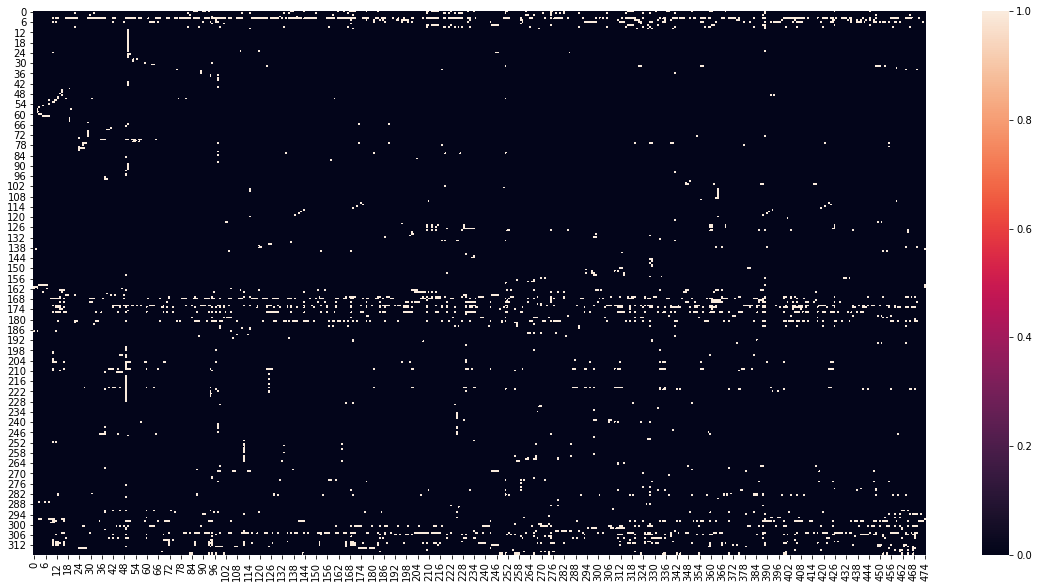

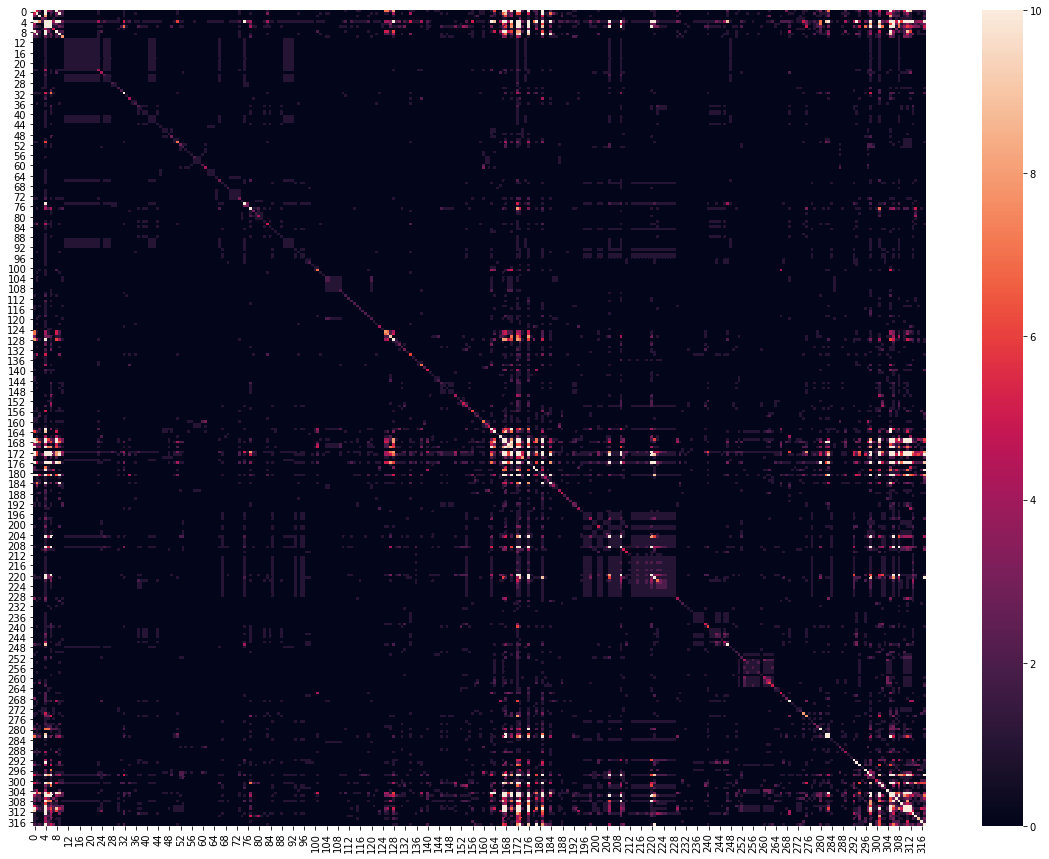

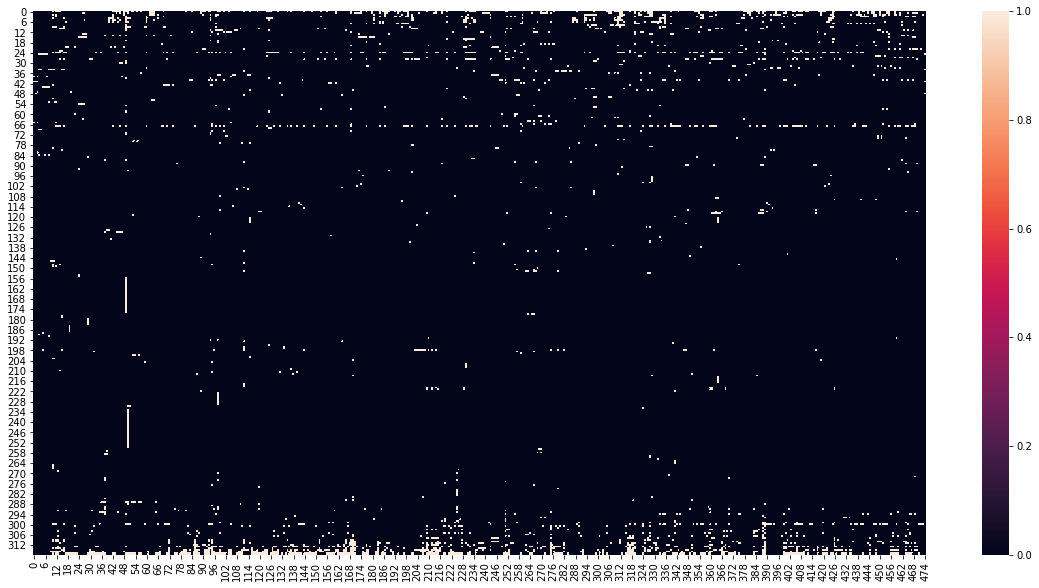

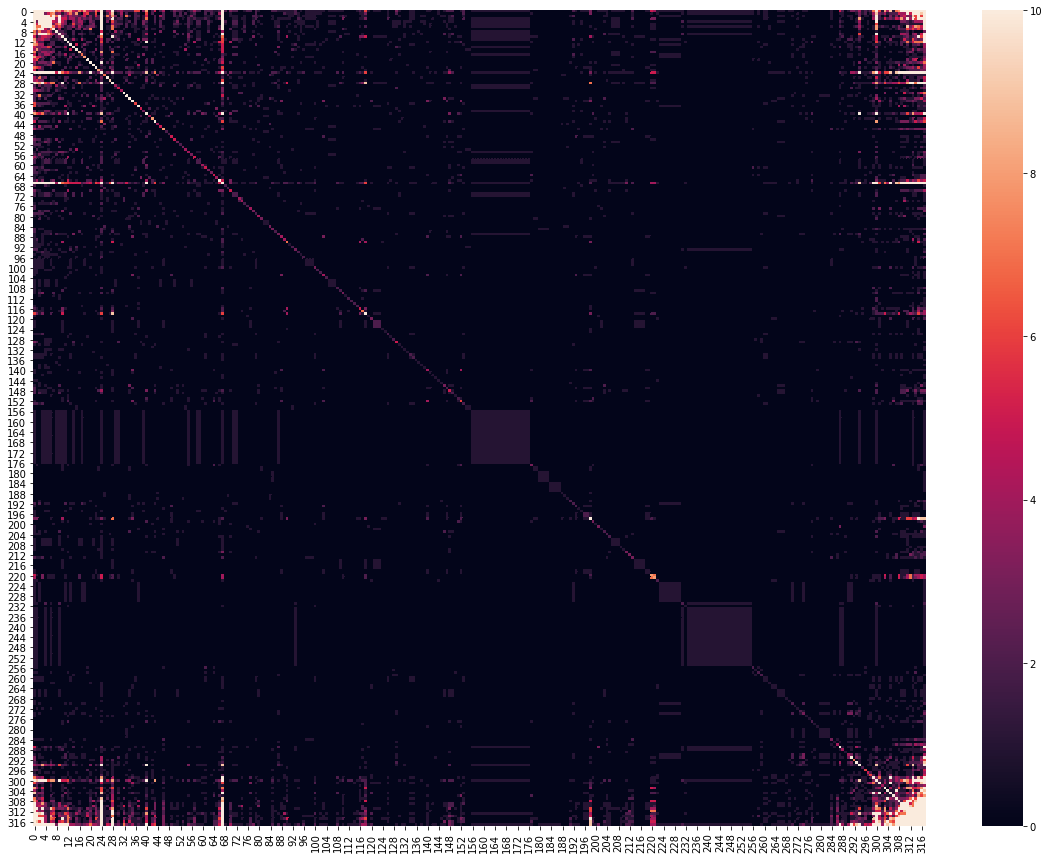

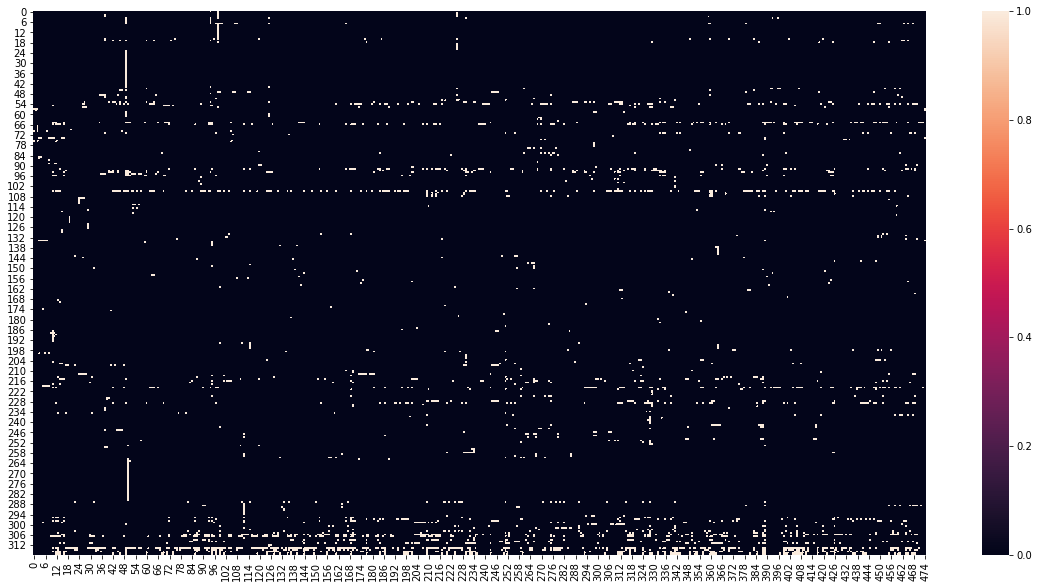

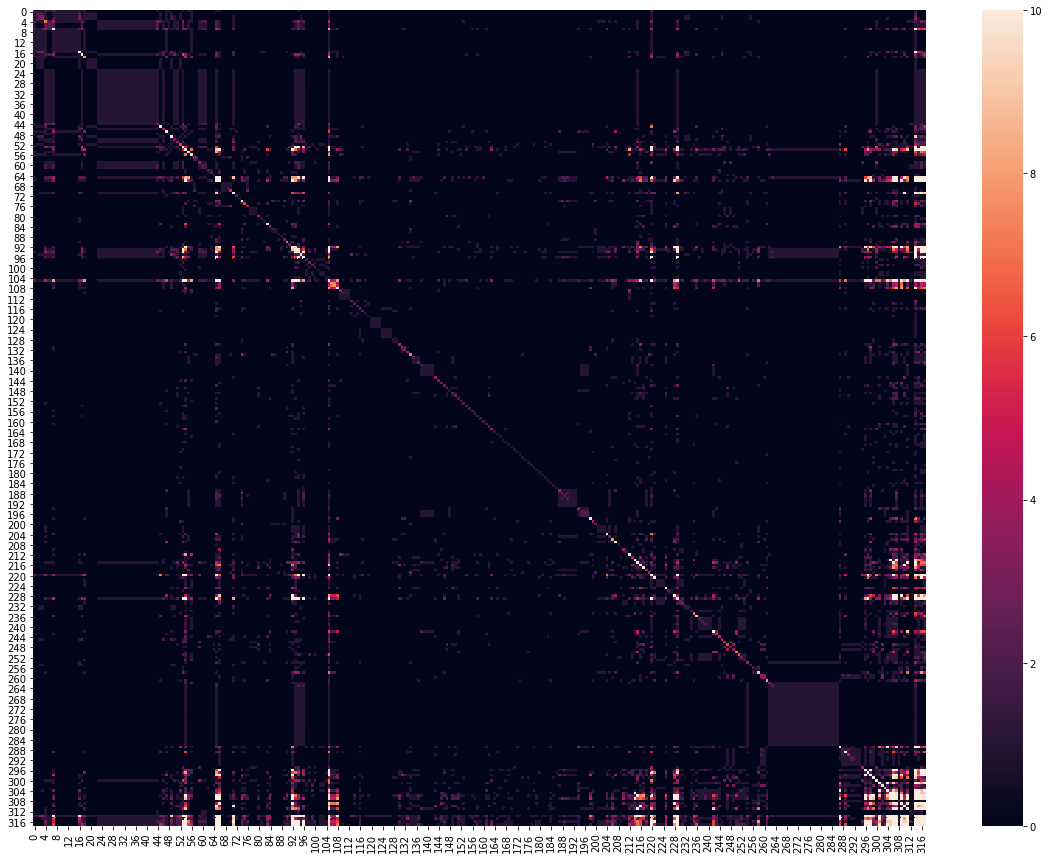

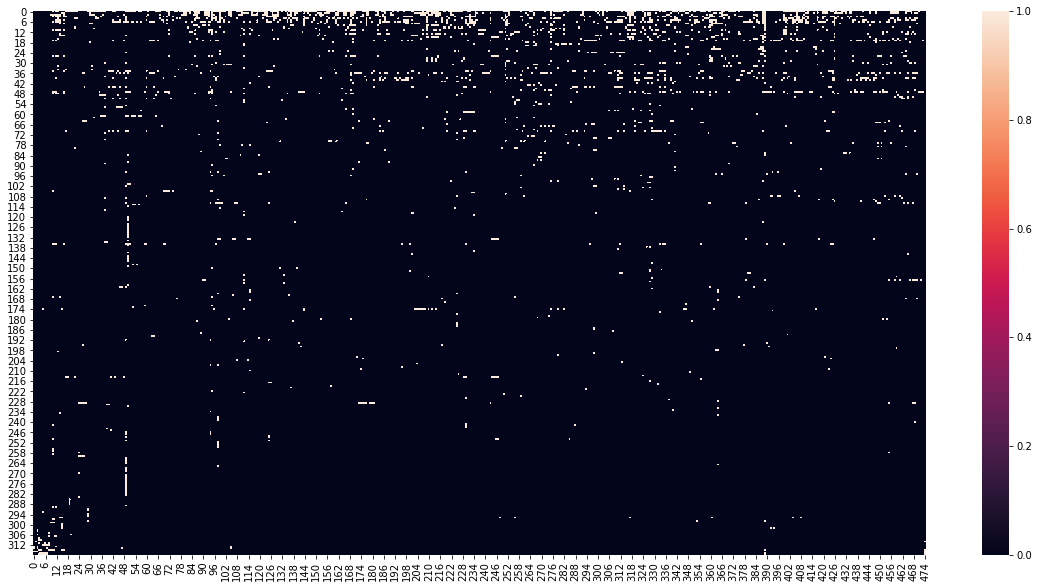

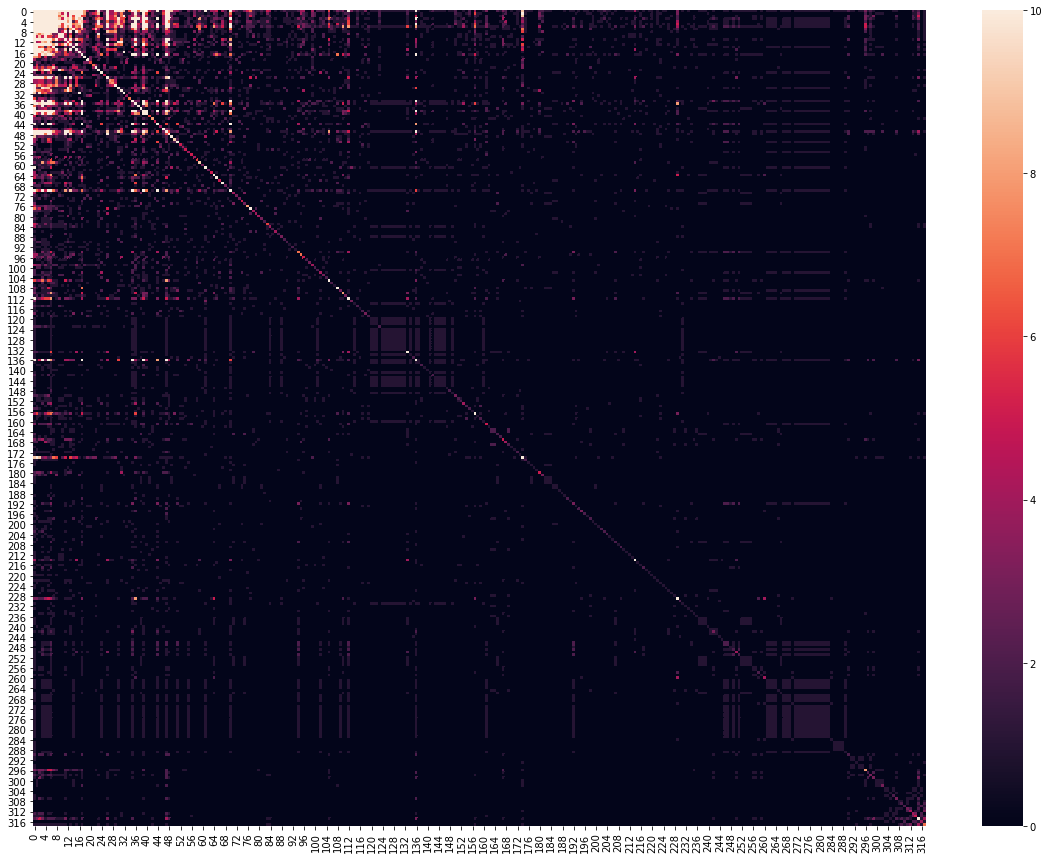

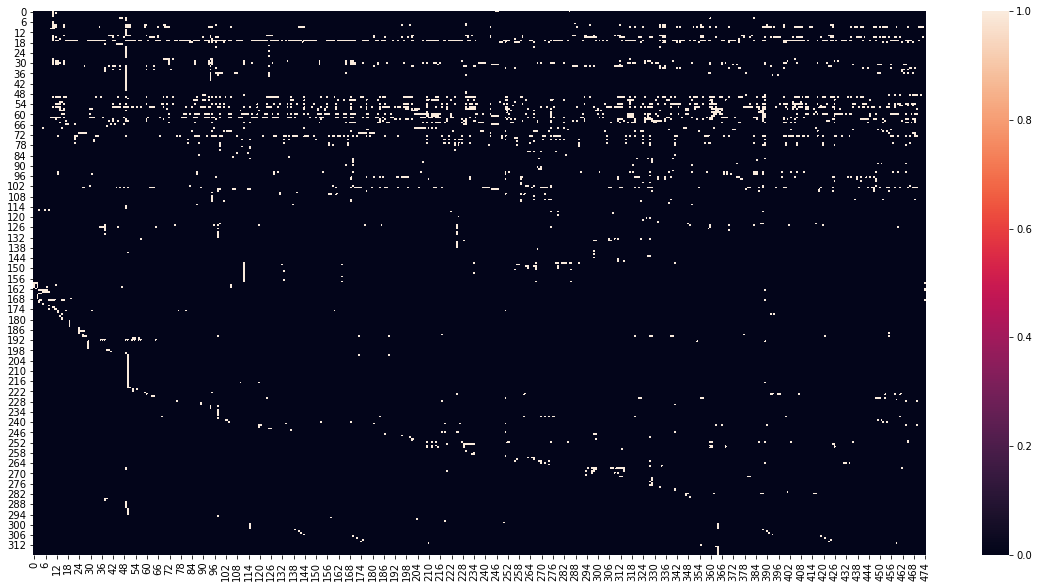

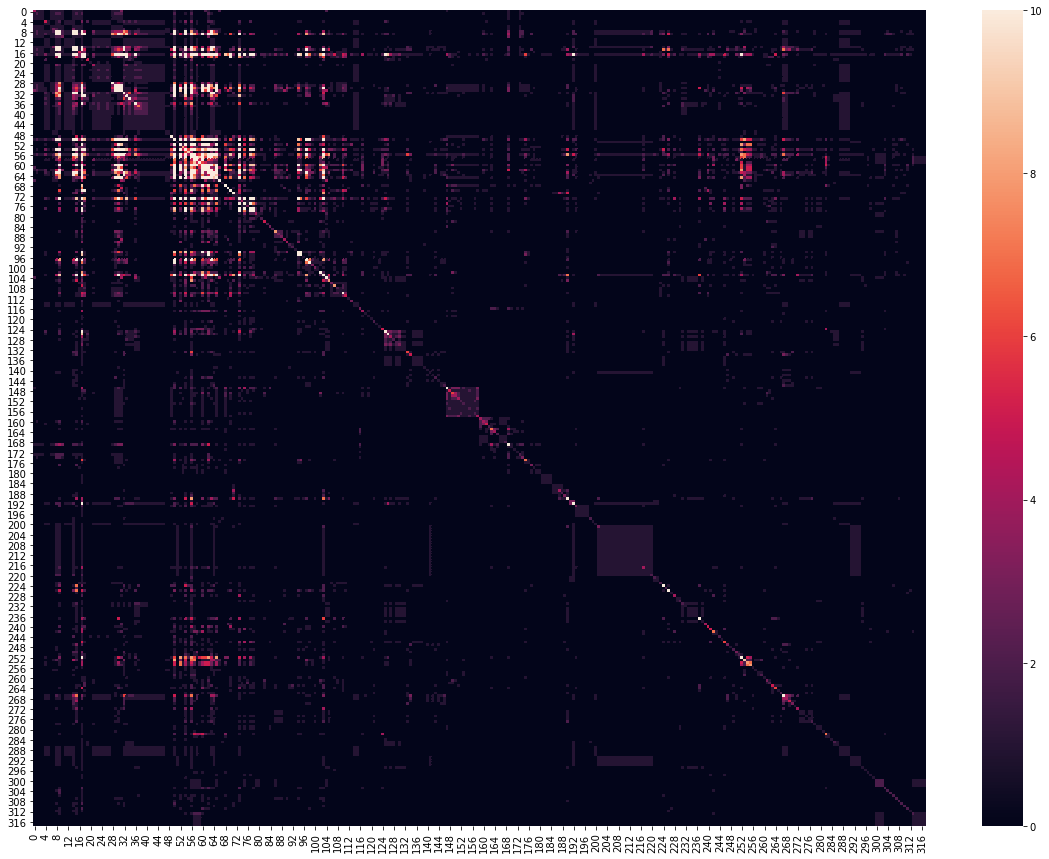

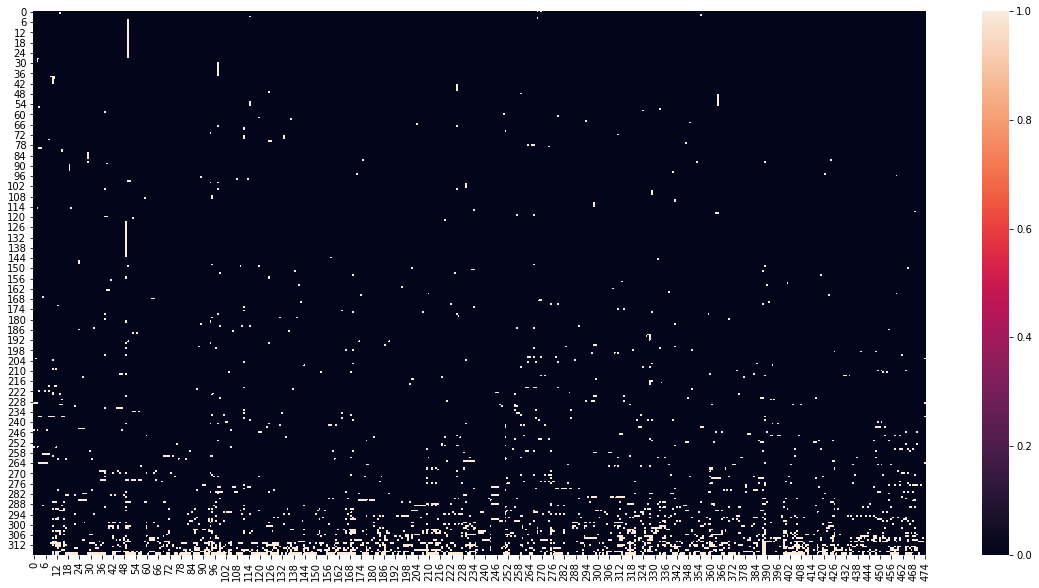

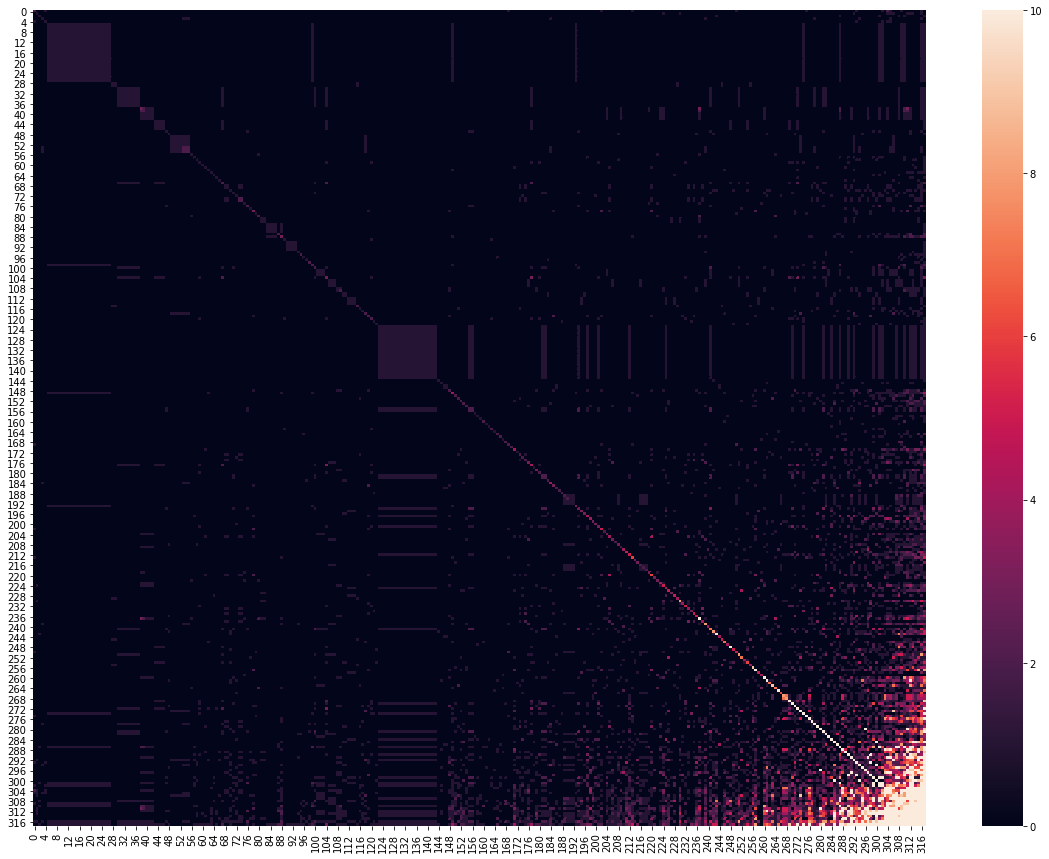

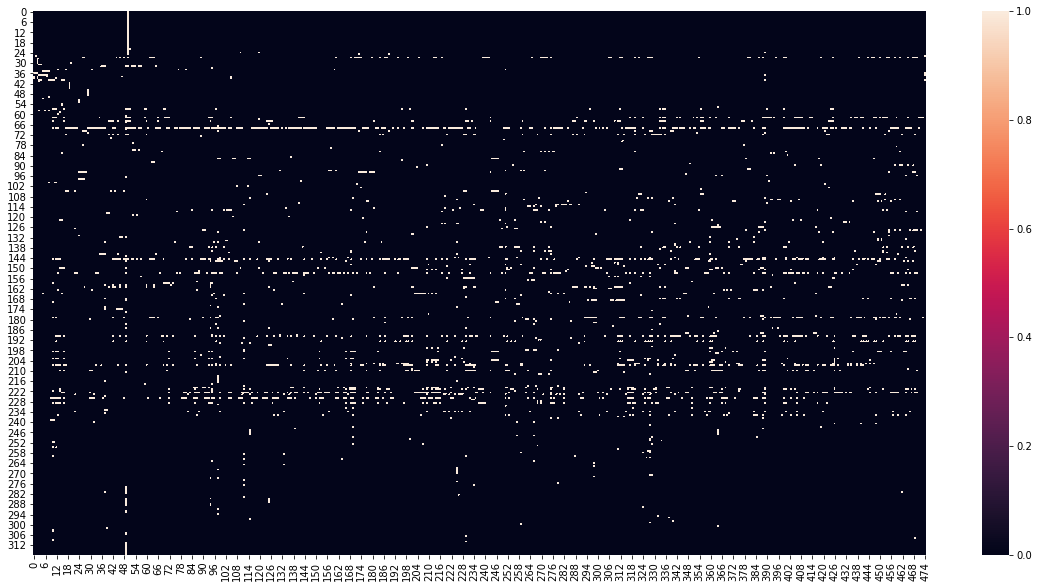

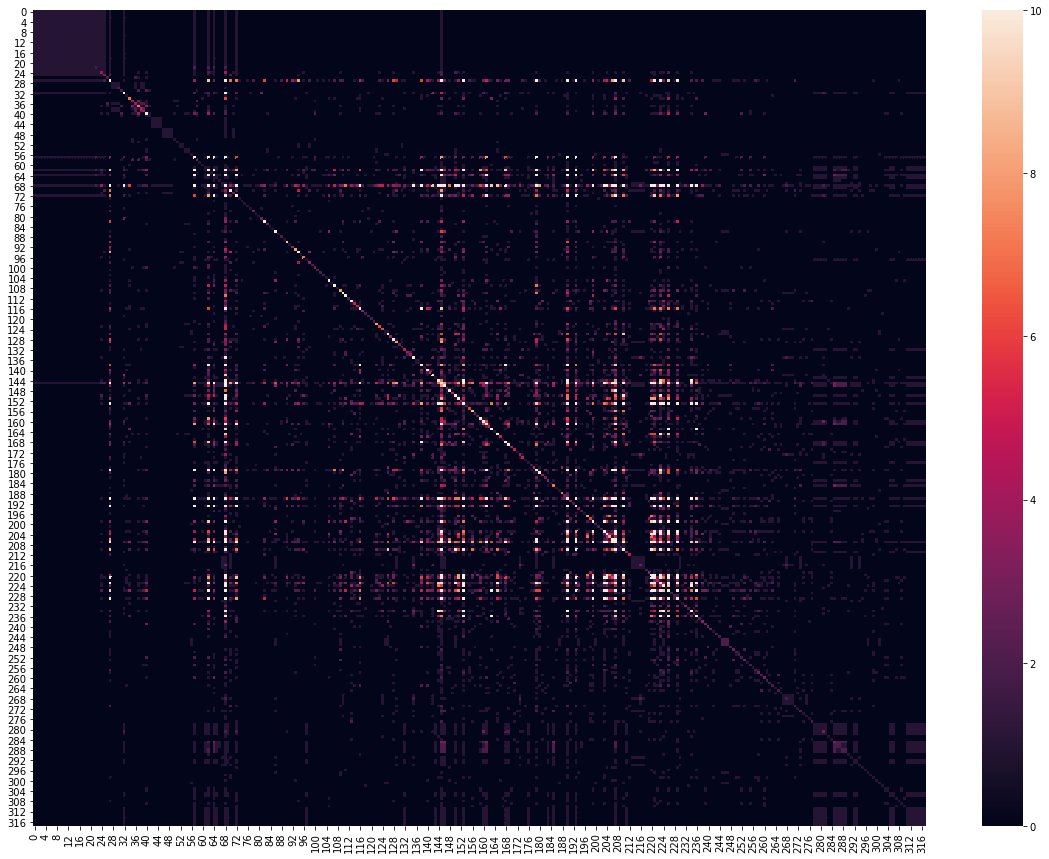

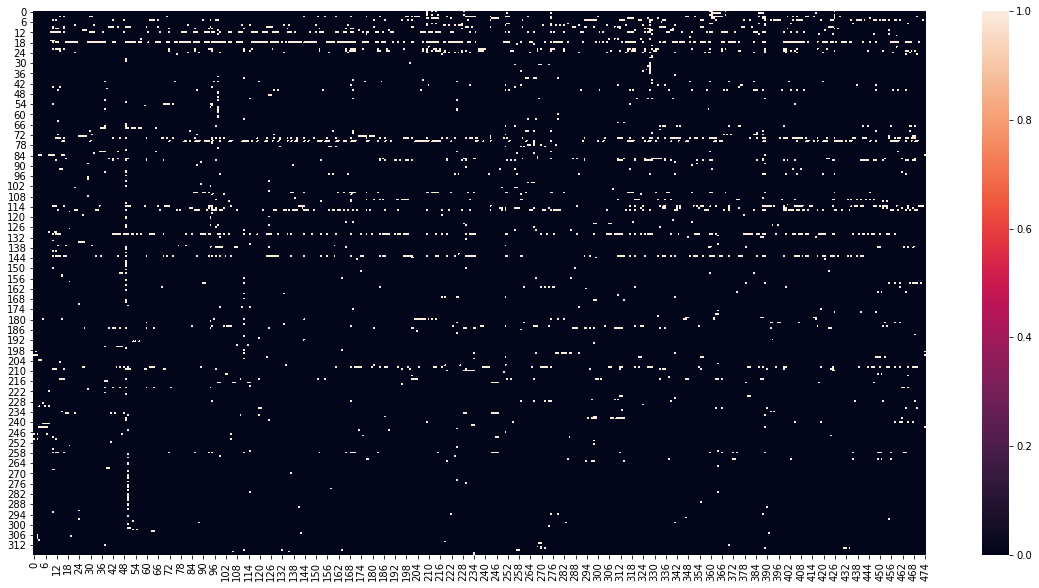

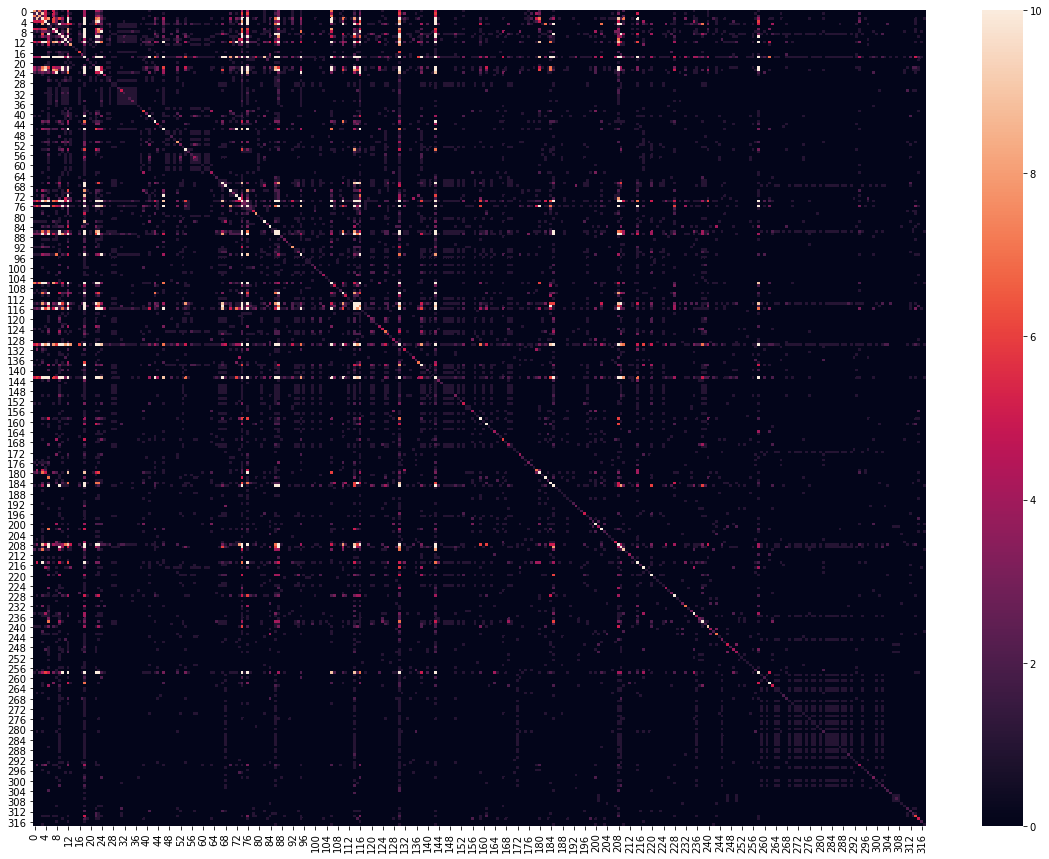

In [10]:
for embedding in data_1D:
    df['col_temp'] = embedding
    df_copy = df.sort(columns='col_temp',ascending=False)
    array_to_plot = []
    for index,character in df_copy.iterrows():
        current = []
        for a in character.keys():
            if 'appears_in_scene_' in a:
                current.append(character[a])
        array_to_plot.append(current)
        
    # Plot Timeline
    plt.figure(figsize=(20,10))
    sns.heatmap(array_to_plot)
    plt.show()
    
    array_to_plot = np.array(array_to_plot)
    co_occurence = np.dot(array_to_plot,array_to_plot.T)
#     co_occurence.shape
    plt.figure(figsize=(20,15))
    sns.heatmap(data=co_occurence, vmax=10)
    plt.show()

    

# Based on Co_Occurence Matrix

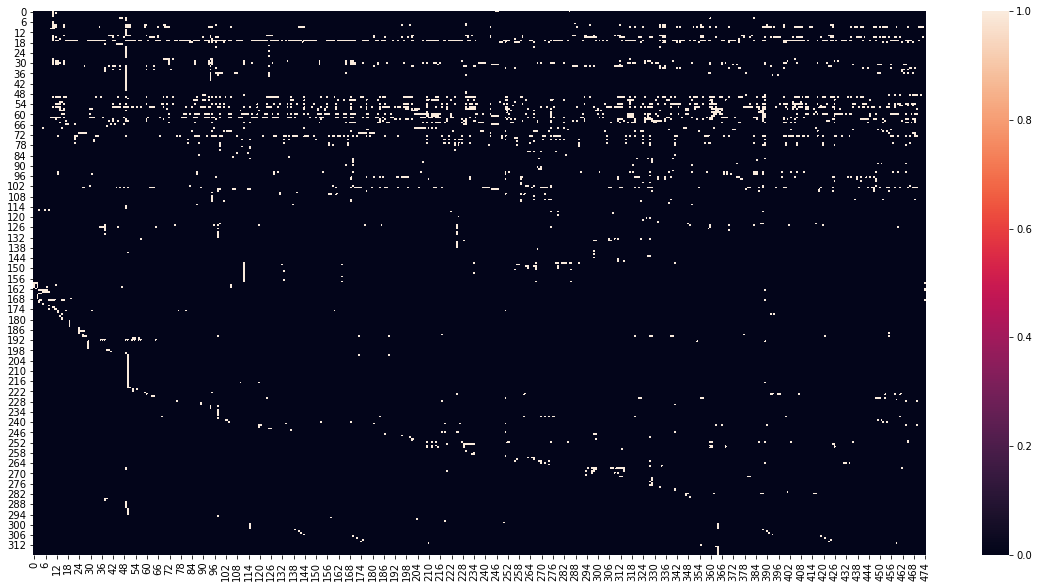

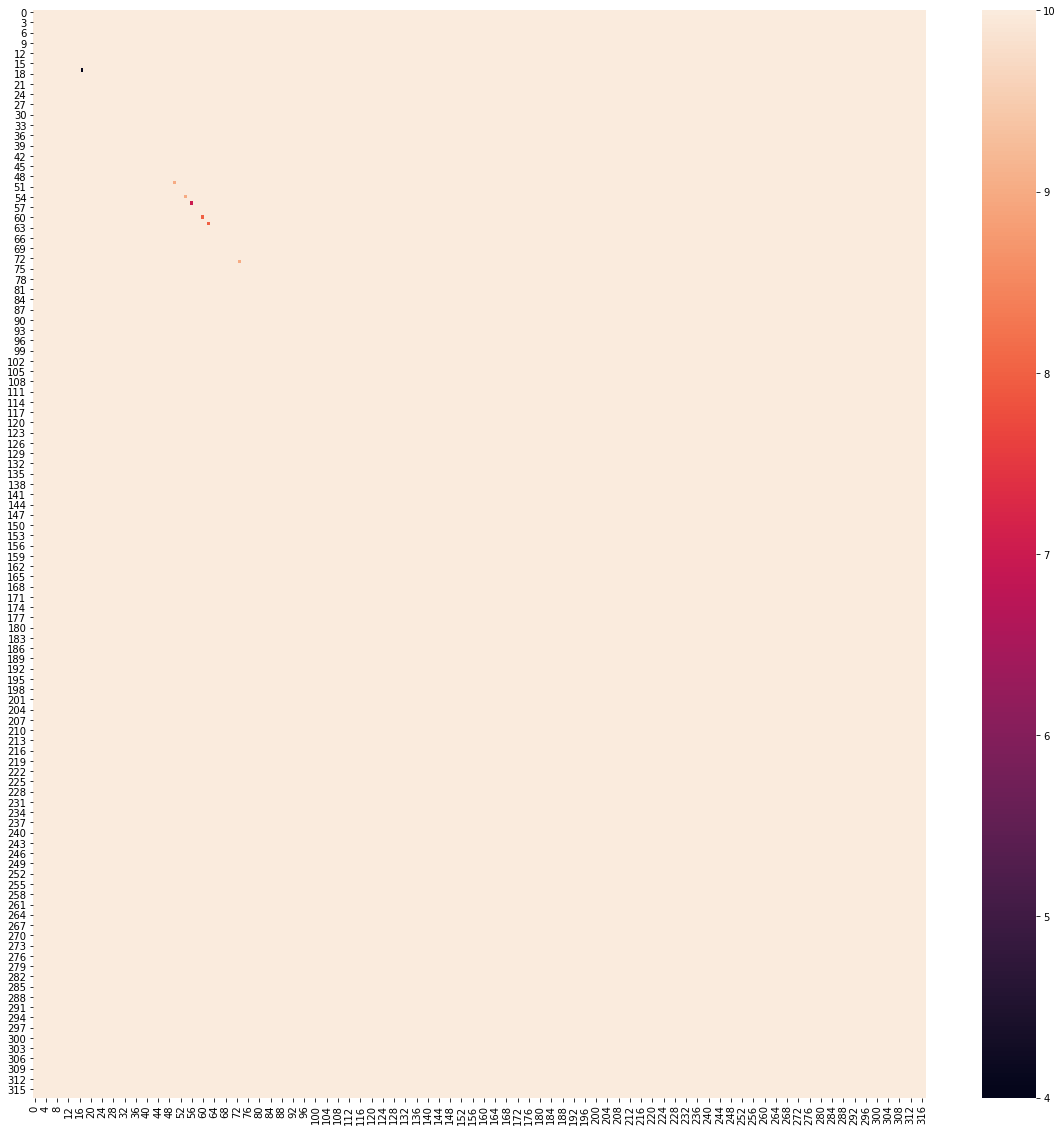

In [11]:
array_to_plot = []
for index,character in df.iterrows():
    current = []
    for a in character.keys():
        if 'appears_in_scene_' in a:
            current.append(character[a])
    array_to_plot.append(current)

# Plot Timeline
plt.figure(figsize=(20,10))
sns.heatmap(array_to_plot)
plt.show()

array_to_plot = np.array(array_to_plot)
co_occurence = np.dot(array_to_plot,array_to_plot.T)

n = co_occurence.shape[0]
for i in range(n):
    for j in range(n):
        if co_occurence[i][j] >= 1:
            co_occurence[i][j] = 1000./co_occurence[i][j]
#             co_occurence[i][j] = 1
        else:
            co_occurence[i][j] = 1000
    
co_occurence_raw = co_occurence.copy()
#     co_occurence.shape
plt.figure(figsize=(20,20))
sns.heatmap(data=co_occurence, vmax=10)
plt.show()

In [12]:
import sklearn
X_MDS_Matrix_Co_Occurence = sklearn.manifold.MDS(
    n_components=1, 
    dissimilarity='precomputed',
    metric=True, 
    n_init=4, 
    max_iter=300, 
    verbose=3, 
    eps=0.001, 
    n_jobs=1, 
    random_state=None

).fit_transform(co_occurence_raw)

it: 0, stress 49240510065.2
it: 1, stress 16687083892.8
it: 2, stress 16614857444.5
it: 3, stress 16550665582.2
it: 4, stress 16493755997.1
it: 5, stress 16441829678.8
it: 6, stress 16389769133.3
it: 7, stress 16343663696.7
it: 8, stress 16302646011.9
it: 9, stress 16261928659.4
it: 10, stress 16224372178.4
it: 11, stress 16191736704.8
it: 12, stress 16163678833.3
it: 13, stress 16137373415.1
it: 14, stress 16113713987.8
it: 15, stress 16093894766.9
it: 16, stress 16077746469.5
it: 17, stress 16065027478.2
it: 18, stress 16053652422.5
it: 19, stress 16043977638.3
it: 20, stress 16036147083.2
it: 21, stress 16029473218.3
it: 22, stress 16023828327.0
it: 23, stress 16019130114.2
it: 24, stress 16015231571.8
it: 25, stress 16012372891.9
it: 26, stress 16009772014.2
it: 27, stress 16007355491.2
it: 28, stress 16005595472.7
it: 29, stress 16003968074.6
it: 30, stress 16002698213.8
it: 31, stress 16001755173.4
it: 32, stress 16001136233.4
it: 33, stress 16000267370.5
it: 34, stress 159993747

/Users/xavier/anaconda/envs/py35/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


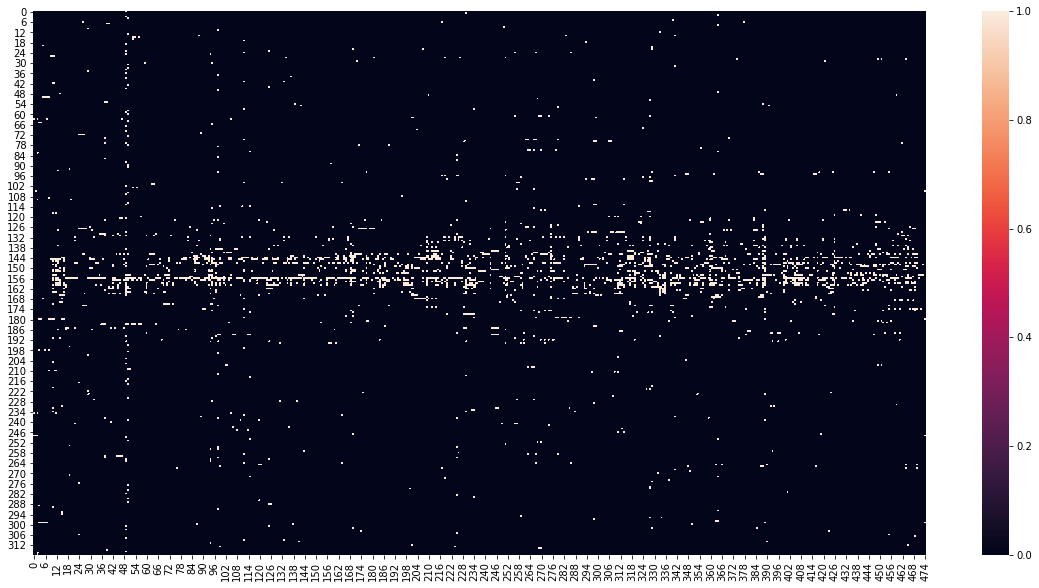

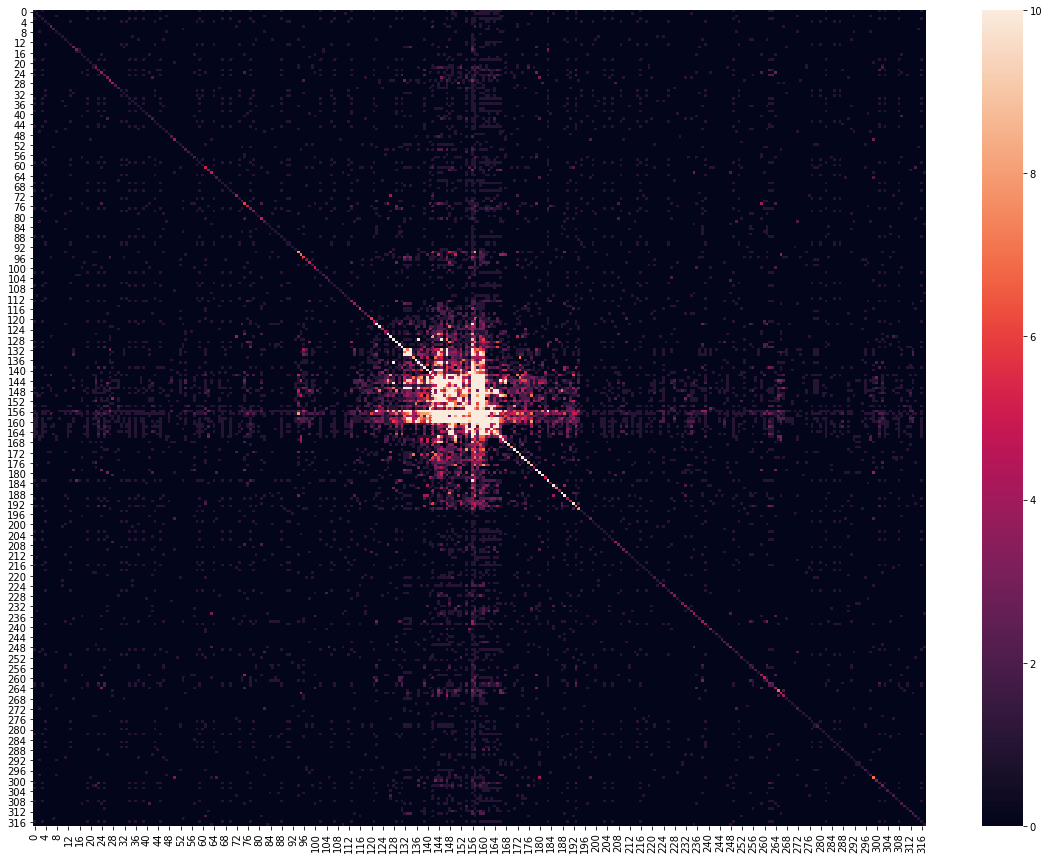

In [13]:
df['col_temp'] = X_MDS_Matrix_Co_Occurence
df_copy = df.sort(columns='col_temp',ascending=False)
array_to_plot = []
for index,character in df_copy.iterrows():
    current = []
    for a in character.keys():
        if 'appears_in_scene_' in a:
            current.append(character[a])
    array_to_plot.append(current)

# Plot Timeline
plt.figure(figsize=(20,10))
sns.heatmap(array_to_plot)
plt.show()

array_to_plot = np.array(array_to_plot)
co_occurence = np.dot(array_to_plot,array_to_plot.T)
#     co_occurence.shape
plt.figure(figsize=(20,15))
sns.heatmap(data=co_occurence, vmax=10)
plt.show()

In [14]:
# X_TSNE_Matrix_Co_Occurence = manifold.TSNE(
#                                 n_components=1, 
#                                 perplexity=10, 
#                                 metric='precomputed', 
#                                 random_state=0,
#                                 n_iter=10000, 
#                                 n_iter_without_progress=3000, 
#                                 min_grad_norm=1e-015
#                             ).fit_transform(co_occurence_raw)


# t0 = time()
# X_tsne = tsne.fit_transform(X)
# df['col_temp'] = X_TSNE_Matrix_Co_Occurence
# df_copy = df.sort(columns='col_temp',ascending=False)
# array_to_plot = []
# for index,character in df_copy.iterrows():
#     current = []
#     for a in character.keys():
#         if 'appears_in_scene_' in a:
#             current.append(character[a])
#     array_to_plot.append(current)

# # Plot Timeline
# plt.figure(figsize=(20,10))
# sns.heatmap(array_to_plot)
# plt.show()

# array_to_plot = np.array(array_to_plot)
# co_occurence = np.dot(array_to_plot,array_to_plot.T)
# #     co_occurence.shape
# plt.figure(figsize=(20,20))
# sns.heatmap(data=co_occurence, vmax=10)
# plt.show()

In [15]:
# Create JSON
nodes = []
for index,row in df_copy.iterrows():
    nodes.append({
        'id':row['_name'],
        'group':1
    })

In [16]:
links = []
n = co_occurence.shape[1]
print(n)
for i in range(n):
    for j in range(n):
        if i > j:
            if co_occurence[i][j] > 0:
                links.append({
                    'source': nodes[i]['id'],
                    'target': nodes[j]['id'],
                    'value': int(co_occurence[i][j])
                })

318


In [17]:
import json
output = {
    'nodes':nodes,
    'links':links
}
with open('data/novel/bible.json', 'w') as outfile:
    json.dump(output, outfile)

# Test Miserables

In [18]:
# Test Miserables
# print T
# import json
# miserables = json.load(open('data/miserables.json'))
# n = len(miserables['nodes'])
# co_occurence = np.zeros((n,n))
# for link in miserables['links']:
#     i = link['source']
#     j = link['target']
#     co_occurence[i][j] = int(link['value'])
#     co_occurence[j][i] = int(link['value'])
    
# for i in range(n):
#     co_occurence[i][i] = 1000
    
    
# co_occurence_raw = co_occurence.copy()

# n = co_occurence.shape[0]
# for i in range(n):
#     for j in range(n):
#         if co_occurence[i][j] == 1000:
#             co_occurence[i][j] = 0
#         elif co_occurence[i][j] > 0:
#             co_occurence[i][j] = 100./co_occurence[i][j]
# #             co_occurence[i][j] = 1
#         else:
#             co_occurence[i][j] = 10000000


# plt.figure(figsize=(20,20))
# sns.heatmap(data=co_occurence_raw, vmax=10)
# plt.show()


# plt.figure(figsize=(20,20))
# sns.heatmap(data=co_occurence, vmax=100)
# plt.show()

In [19]:
# import sklearn
# X_MDS_Matrix_Co_Occurence = sklearn.manifold.MDS(
#     n_components=1, 
#     dissimilarity='precomputed',
#     metric=True, 
#     n_init=4, 
#     max_iter=300, 
#     verbose=1, 
#     eps=0.00001, 
#     n_jobs=1, 
#     random_state=None

# ).fit_transform(co_occurence)

In [20]:
# import pandas as pd
# df_miserables = pd.DataFrame.from_dict(miserables['nodes'])
# df_miserables['index'] = range(len(miserables['nodes']))
# df_miserables

In [21]:
# df_miserables['col_temp'] = X_MDS_Matrix_Co_Occurence
# df_copy = df_miserables.sort(columns='col_temp',ascending=False)
# # df_copy = df_miserables
# df_copy

In [22]:
# array_to_plot = []
# for index,character in df_copy.iterrows():
#     current = []
#     for index2,character2 in df_copy.iterrows():
#         current.append(co_occurence_raw[character['index'],character2['index']])
#     array_to_plot.append(current)

# # Plot Output
# plt.figure(figsize=(20,10))
# sns.heatmap(array_to_plot, vmax=10)
# plt.show()

In [23]:
# # 2
# X_MDS_Matrix_Co_Occurence = sklearn.manifold.MDS(
#     n_components=2, 
#     dissimilarity='precomputed',
#     metric=True, 
#     n_init=4, 
#     max_iter=300, 
#     verbose=1, 
#     eps=0.01, 
#     n_jobs=1, 
#     random_state=None

# ).fit_transform(co_occurence)
# X_MDS_Matrix_Co_Occurence = np.array(X_MDS_Matrix_Co_Occurence)
# plt.figure(figsize=(10,10))
# plt.scatter(X_MDS_Matrix_Co_Occurence.T[0],X_MDS_Matrix_Co_Occurence.T[1],c=df_miserables['group'], s=40)

In [24]:
# X_iso = manifold.Isomap(n_neighbors=10, n_components=2).fit_transform(co_occurence_raw)

In [25]:
# X_iso = np.array(X_iso)
# plt.figure(figsize=(10,10))
# plt.scatter(X_iso.T[0],X_iso.T[1],c=df_miserables['group'], s=40)